## Phase 5 Capstone Project

Group Members

* Wendy Muturi
* Mulei Mutuku
* Margaret Mitey
* Jeff Kiarie
* Linus Gichuhi
* Joshua Ooko

## Business Understanding

### Introduction

In an age where culinary diversity and dining out have become integral parts of our social fabric, choosing the perfect restaurant can be both exciting and overwhelming. With an abundance of dining options ranging from quaint bistros to exotic eateries, making a dining decision has never been more challenging.
Traditional restaurant websites have long relied on filters based on amenities, location, or cuisine types, providing users with a plethora of options to sift through. However, as the restaurant industry evolves and culinary landscapes expand, the need for a more refined and personalized approach to restaurant discovery has become evident.
Enter the era of restaurant recommendation systems—a technological marvel that goes beyond the mundane task of filtering restaurants based on their amenities. These systems leverage the power of data science, machine learning, and user preferences to deliver tailored dining suggestions that match your unique tastes and preferences.

In a world where time is precious and choices are abundant, restaurant recommendation systems offer an invaluable solution by enhancing the dining experience in ways that traditional filters simply cannot.
This article delves into the world of restaurant recommendation systems, exploring their importance, functionality, and the transformative impact they have on the way we discover and enjoy culinary delights.
We will unveil how these intelligent algorithms are reshaping the gastronomic landscape, catering to the ever-evolving preferences of diners and revolutionizing the art of restaurant selection. Join us on this journey as we unravel the magic of restaurant recommendation systems, offering a taste of the future of dining exploration.


### Problem Statement

Traditional restaurant search platforms rely on static filters that do not adapt to individual preferences, resulting in time-consuming and often frustrating experiences for diners who seek restaurants that align with their unique tastes.
By prioritizing amenities over personalized recommendations, existing systems hinder the exploration of new culinary experiences and limit the potential for serendipitous discoveries that could enhance the dining experience.


### Main Objective

To develop an interactive and user-friendly restaurant recommendation system.

### Specific Objective
To design and develop a user-friendly website that seamlessly integrates the advanced restaurant recommendation system, allowing users to access personalized dining suggestions.

To identify and analyze key factors that significantly influence restaurant ratings and user preferences, incorporating this knowledge into the recommendation system's algorithms.

To implement a robust data collection and processing pipeline to continually update user data and restaurant information, ensuring the recommendation system remains dynamic and accurate.

### Metric of Success

To consider our project successful, we aim to achieve high accuracy in classifying user sentiment, maintain a low Root Mean Square Error (RMSE) in predicting engagement, and offer insightful location-based analysis.


## Data Understanding

We will collect Yelp review data, including text reviews, star ratings, and business information, from the [Yelp dataset](https://www.yelp.com/dataset), which is publicly available and contains a large number of reviews across various businesses and locations.Our plan involves obtaining a substantial sample of Yelp reviews spanning different business categories, locations, and star ratings. This data will serve as our training and evaluation dataset.

Features include: 
**review_id:** A unique identifier for each review,

**user_id:** A unique identifier for each user who submitted a review,

**business_id:** A unique identifier for each business being reviewed,

**stars:** The rating given by the user in terms of stars (e.g., 1.0, 2.0, 3.0, 4.0, 5.0),

**useful:** A count of how many users found the review useful,

**funny:** A count of how many users found the review funny,

**cool:** A count of how many users found the review cool,

**text:** The actual text content of the review and

**date:** The date and time when the review was submitted.Due to the dataset being large we have constricted it to 15,438 rows which should be enough for nlp modeling.




In [3]:
# importing necesarry packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
import folium
from surprise import Reader, Dataset
from wordcloud import WordCloud
from tabulate import tabulate
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# plotting styles
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
# loading the businesses dataset
business= pd.read_csv("./data/business.csv")
# previewing the datasetdata.loc[ data.categories.str.contains('Restaurants')]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
# viewing the datasets features/columns
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   54380 non-null  object 
 1   name          54380 non-null  object 
 2   address       52551 non-null  object 
 3   city          54380 non-null  object 
 4   state         54380 non-null  object 
 5   postal_code   54360 non-null  object 
 6   latitude      54380 non-null  float64
 7   longitude     54380 non-null  float64
 8   stars         54380 non-null  float64
 9   review_count  54380 non-null  int64  
 10  is_open       54380 non-null  int64  
 11  attributes    49543 non-null  object 
 12  categories    54342 non-null  object 
 13  hours         45975 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.8+ MB


In [6]:
# loading the second dataset review.csv
review=pd.read_csv("./data/review.csv")
# previewing the dataset
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [7]:
# viewing the datasets features/columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    54380 non-null  object 
 1   user_id      54380 non-null  object 
 2   business_id  54380 non-null  object 
 3   stars        54380 non-null  float64
 4   useful       54380 non-null  int64  
 5   funny        54380 non-null  int64  
 6   cool         54380 non-null  int64  
 7   text         54380 non-null  object 
 8   date         54380 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


> After previewing both of the datasets, we now merge them into one dataset, using the **business_id** column as primary key so as to obtain all the feature in one dataset for easier analysis. 

In [8]:
# merging the two datasets into one using the business_id primary key

data=pd.merge(left=review , right=business, how='left', on='business_id')

# previewing the new merge dataset
data.head()


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [9]:
# previewing the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54380 entries, 0 to 54379
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     54380 non-null  object 
 1   user_id       54380 non-null  object 
 2   business_id   54380 non-null  object 
 3   stars_x       54380 non-null  float64
 4   useful        54380 non-null  int64  
 5   funny         54380 non-null  int64  
 6   cool          54380 non-null  int64  
 7   text          54380 non-null  object 
 8   date          54380 non-null  object 
 9   name          54380 non-null  object 
 10  address       53926 non-null  object 
 11  city          54380 non-null  object 
 12  state         54380 non-null  object 
 13  postal_code   54380 non-null  object 
 14  latitude      54380 non-null  float64
 15  longitude     54380 non-null  float64
 16  stars_y       54380 non-null  float64
 17  review_count  54380 non-null  int64  
 18  is_open       54380 non-nu

In [10]:
data.to_csv("./data/data.csv", index=False)

In [11]:
data.describe()

,stars_x,useful,funny,cool,latitude,longitude,stars_y,review_count,is_open
count,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000
mean,3.844980,0.890438,0.253567,0.346396,36.050556,-89.005350,3.769796,389.177014,0.766532
std,1.352256,1.866532,1.035998,1.073067,5.289909,14.446695,0.671340,628.925711,0.423041
min,1.000000,0.000000,0.000000,0.000000,27.584300,-120.026076,1.000000,5.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,29.967159,-90.239235,3.500000,61.000000,1.000000
50%,4.000000,0.000000,0.000000,0.000000,38.612534,-86.252569,4.000000,170.000000,1.000000
75%,5.000000,1.000000,0.000000,0.000000,39.946685,-75.325252,4.000000,430.000000,1.000000
max,5.000000,91.000000,98.000000,49.000000,53.644501,-74.658572,5.000000,4554.000000,1.000000


## Data Preparation

In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;

- Renaming columns
- Checking Dealing with missing data
- Checking and removing duplicates 
- Feature Engineering
- Selecting the Relevant Columns
- Droping Irrelevant columns


### Renaming columns

Renaming the **stars_x** and **stars_y** columns into **rating** and **b/s_rating** columns for better understanding

In [12]:
data.rename(columns={'stars_x':'rating', 'stars_y':'b/s_rating'}, inplace=True)

### Dealing with missing data

Missing values can lead to gaps in your dataset, making it incomplete and potentially unreliable for analysis. By addressing missing values, you ensure that you have a more comprehensive dataset to work with.

In [13]:
# checking for columns with missing values
data.isna().sum()

review_id          0
user_id            0
business_id        0
rating             0
useful             0
funny              0
cool               0
text               0
date               0
name               0
address          454
city               0
state              0
postal_code        0
latitude           0
longitude          0
b/s_rating         0
review_count       0
is_open            0
attributes       842
categories         2
hours           3101
dtype: int64

> The main columns in our analysis, that will be used to develope the recommendation system are **user_id**, **business_id** and **rating**. Therefore, since the columns that have missing values only provide metadata/ more information about our restaurants i.e **address, attribute, categories ** **and hours**, then we will impute the missing values with "Not-Avaliable" since they won't influence our analysis 


In [14]:
# Imputing missing values in the address column with "Not-Available"
data.address.fillna(value="Not-Available", inplace=True)

In [15]:
# Imputing missing values in the attributes column with "Not-Available" 
data.attributes.fillna(value="Not-Available", inplace=True)

In [16]:
# Imputing missing values in the categories column with "Not-Available" 
data.categories.fillna(value="Not-Available", inplace=True)

In [17]:
# Imputing missing values in the hours column with "Not-Available" 
data.hours.fillna(value="Not-Available", inplace=True)

In [18]:
# previewing our changes
data.isna().sum()

review_id       0
user_id         0
business_id     0
rating          0
useful          0
funny           0
cool            0
text            0
date            0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
b/s_rating      0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

### Dealing with Duplicates

In order to avoid inaccurate insights we have to deal with duplicate data becuase deuplicate data can lead to incorrect or misleading insights.

In [19]:
# checking for duplicated columns
print("Duplicates: ",data.duplicated().sum())

Duplicates:  0


> - Our data has no duplicates

### Feature Engineering

In feaure engineering, we will combine the **city**, **state**, **address** columns to form one column, **location** column with the intention to perform geospatial analysis or visualization. Having a unified location column simplifies the process and you can use the location column directly to create maps or explore geographic trends.

In [20]:
# combining the address columns
data['location']=data[['city','state','address']]\
            .apply( lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ", axis=1)

# then we drop the combined columns
data.drop(columns=['state', 'city','address'], axis=1, inplace=True)

data.location

0        State:PA, City:North Wales, Address:1460 Bethl...
1        State:PA, City:Philadelphia, Address:1923 Ches...
2        State:AZ, City:Tucson, Address:748 W Starr Pas...
3        State:PA, City:Philadelphia, Address:2481 Gran...
4        State:LA, City:New Orleans, Address:2549 Banks...
                               ...                        
54375       State:ID, City:Boise, Address:590 E Boise Ave 
54376    State:MO, City:Saint Louis, Address:1 S Broadway 
54377    State:CA, City:Santa Barbara, Address:119 E Co...
54378    State:LA, City:New Orleans, Address:1418 Magaz...
54379    State:PA, City:West Chester, Address:1233 W Ch...
Name: location, Length: 54380, dtype: object

In [21]:
# categories
data.categories

0        Restaurants, Breakfast & Brunch, Food, Juice B...
1        Active Life, Cycling Classes, Trainers, Gyms, ...
2                          Restaurants, Breakfast & Brunch
3                    Halal, Pakistani, Restaurants, Indian
4        Sandwiches, Beer, Wine & Spirits, Bars, Food, ...
                               ...                        
54375                                    Thai, Restaurants
54376                                   Restaurants, Pizza
54377    Food, Farmers Market, Specialty Food, Fruits &...
54378    Vegetarian, Restaurants, Breakfast & Brunch, C...
54379              Pizza, Restaurants, Sandwiches, Italian
Name: categories, Length: 54380, dtype: object

### Data Spliting
Since our data contains several businesses other than restaurants, we will only select the businesses that are restaurants. Working with a single business category simplifies the problem complexity and sets us in course with our objective and is essential to obtain relevant findings and recommendations.

In [22]:
# selecting only the restaurants
data=data.loc[ data.categories.str.contains('Restaurants')].copy().reset_index(drop=True)
data.shape

(39334, 20)

### Droping Irrelevant columns
The columns **funny, cool, is_open, and date ** are not informative in our analysis and will not be used during analysis, therefore we drop them

In [23]:
# droping unrelevant collumn
cols=['review_id','postal_code','funny', 'cool', 'is_open', 'date']
data.drop(columns=cols, axis=1, inplace=True)

In [24]:
data.columns


Index(['user_id', 'business_id', 'rating', 'useful', 'text', 'name',
       'latitude', 'longitude', 'b/s_rating', 'review_count', 'attributes',
       'categories', 'hours', 'location'],
      dtype='object')

## Explatory Data Analysis

#### 1.Distribution of Ratings

1) What are the differences in the distribution of user ratings and business ratings in the dataset and what do these differences indicate about user preferences?

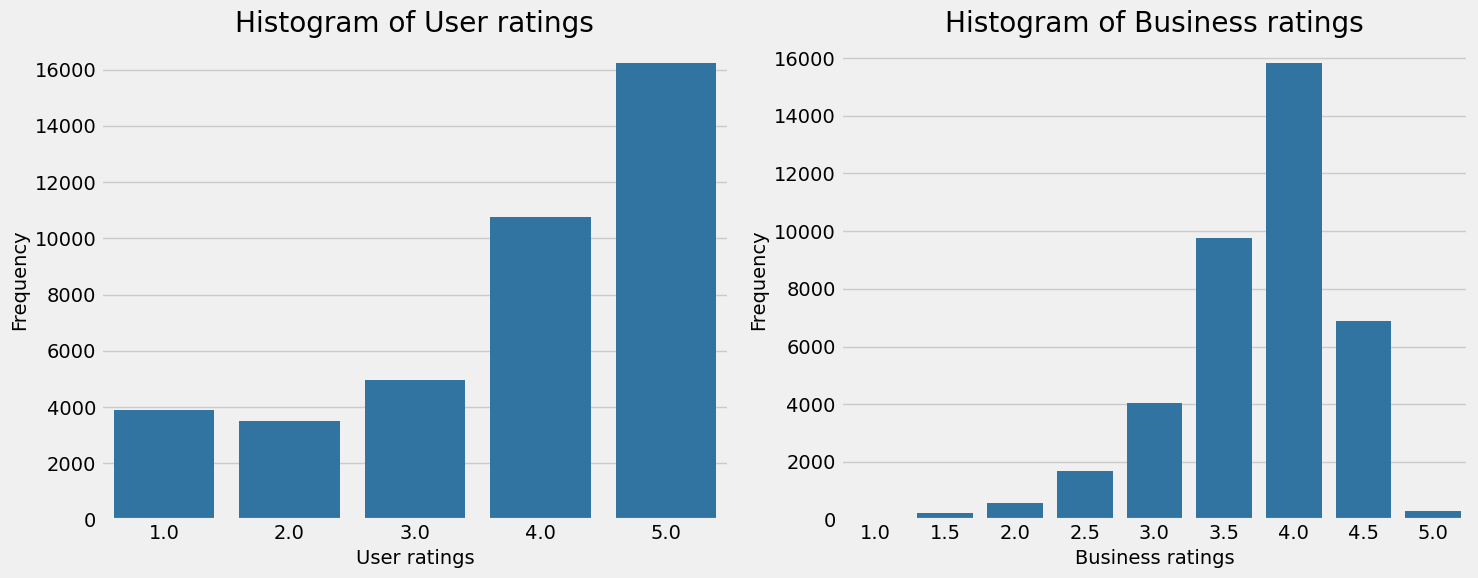

In [25]:
# Assuming you have a DataFrame named 'df' and two numerical columns 'column1' and 'column2'
column1 = 'rating'
column2 = 'b/s_rating'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figsize as needed

# Create histograms for column1 and column2
 
sns.countplot(data=data, x=column1 ,ax=axes[0] , color='tab:blue')
# Adjust the number of bins as needed
axes[0].set_xlabel("User ratings")
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of User ratings')

sns.countplot(data=data, x=column2 ,ax=axes[1] ,color='tab:blue')
  # Adjust the number of bins as needed
axes[1].set_xlabel("Business ratings")
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Business ratings')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [26]:
df_1 = data[['rating', 'b/s_rating', 'review_count']]
df_1.corr()

,rating,b/s_rating,review_count
rating,1.000000,0.409173,0.106111
b/s_rating,0.409173,1.000000,0.237139
review_count,0.106111,0.237139,1.000000


Correlation between Rating and B/S Rating

Corr Value: 0.409173 The positive correlation coefficient of approximately 0.41 suggests a moderate positive relationship between the rating of a restaurant or service and its B/S Rating. In other words, as the rating of a business increases, its B/S Rating tends to increase as well. Businesses with higher individual ratings are likely to have a higher overall rating based on user reviews.

Correlation between Rating and Review Count

Corr Value: 0.106111 The correlation coefficient of about 0.11 indicates a weak positive correlation between the rating of a restaurant or service and its review count.This suggests that businesses with higher ratings may have slightly more reviews, but the relationship is not particularly strong.

Correlation between 'B/S Rating' and 'Review Count':

Corr Value: 0.237139 The correlation coefficient of approximately 0.24 suggests a moderate positive correlation between the B/S Rating of a business and its review count. This implies that businesses with higher B/S Ratings tend to have more user reviews. Customers are more likely to review businesses with higher overall ratings, contributing to the positive correlation.

#### 2.Distribution of Categories

1) What are the most prevalent restaurant categories and how does the distribution of these categories impact the restaurant landscape in terms of user preferences and choices?

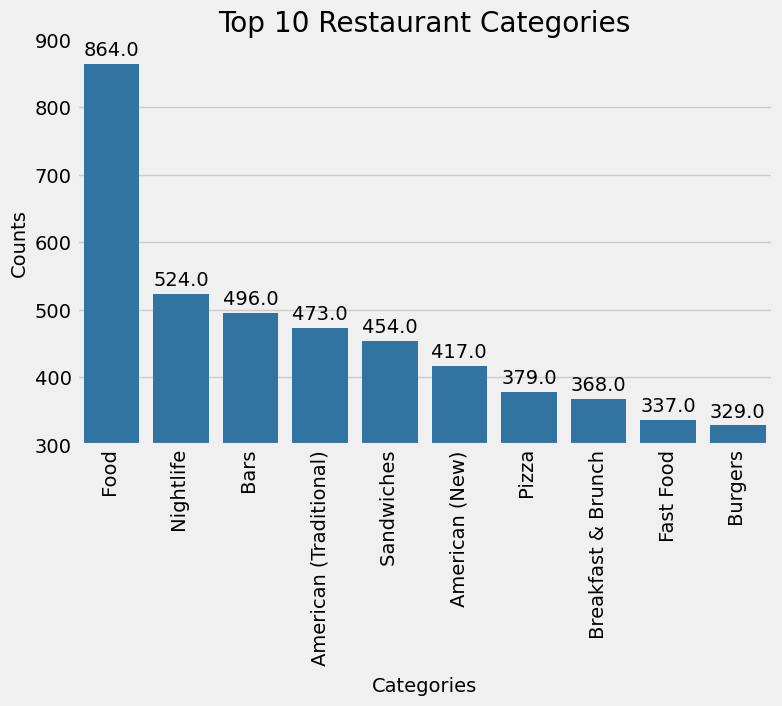

In [27]:

# list of all categories
categories=[ cat for category in data.drop_duplicates('business_id').categories for cat in category.split(',')]
# list of unique categories only
categories=collections.Counter(categories)
#picking the top 20 categories
common=categories.most_common(12)
# ploting
fig, ax=plt.subplots(figsize=(8,5))
x=[ i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([300,900])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');

The plot of restaurant categories reveals that the dataset predominantly consists of food-related establishments, signifying that restaurants serving a variety of cuisines hold the highest representation. Following closely are nightlife-related venues, suggesting a vibrant nightlife scene in the dataset. Conversely, fast food and burger establishments are among the less frequently occurring categories, indicating their lower prevalence within the dataset.

#### 3 Distribution of Restaurants

##### i)cities

1) What are the most frequently occurring cities and how does the distribution of restaurants in these cities impact users' choices of restaurants?

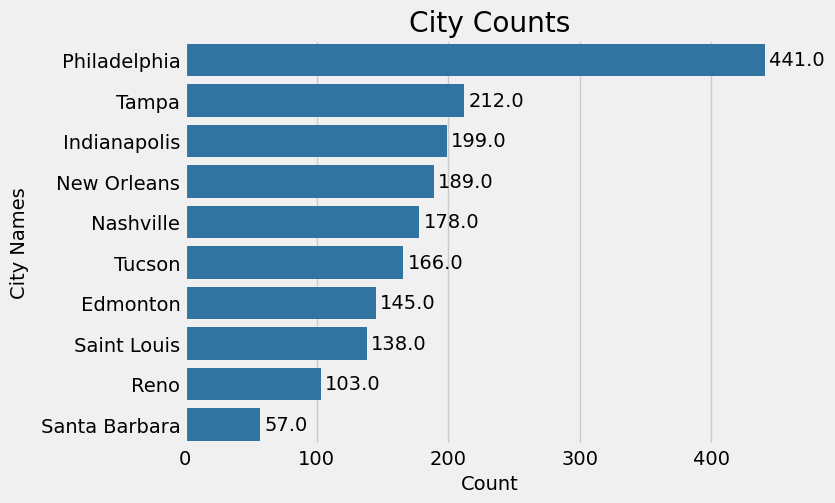

In [28]:

# extract the location column and drop duplicate business entries
location= data.drop_duplicates('business_id')[['location']]
# split the location string to extract the city part, removing city from each entry
city=location.location.apply(lambda x: x.split(',')[1].replace("City:",'')) 
# count the occurrences of each city and selected the top 10 cities
city=collections.Counter(city)
city=city.most_common(10)
# extract the city names and their respective counts
y=[i[0] for i in city]
x=[i[1] for i in city]
# created a barplot to visualize the city counts
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot( y=y, x=x, color='tab:blue')
ax.set_ylabel("City Names")
ax.set_xlabel("Count")
ax.set_title("City Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The analysis of restaurant locations reveals that Philadelphia has the highest number of restaurants in the dataset, making it the most prevalent city. Following, but not as closely, is Tampa, indicating a notable restaurant presence. In contrast, the cities of Reno and Santa Barbara have fewer restaurants, making them less common in this dataset.

##### ii) States

2) What are the most common states and how does the distribution of restaurants across these states impact the types of cuisine available and user preferences for dining?

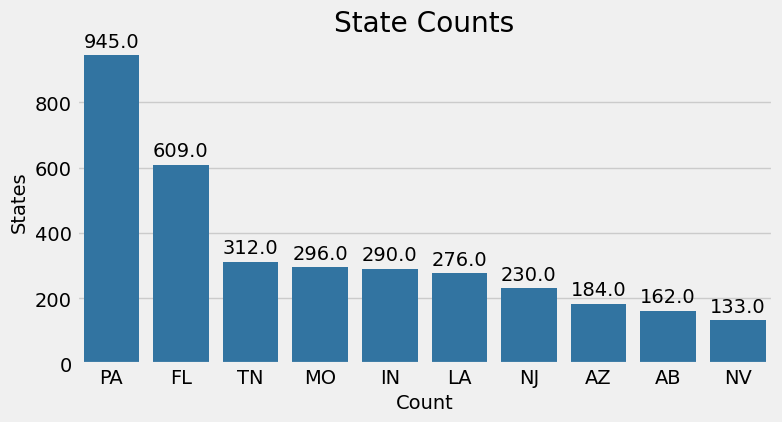

In [29]:
# extract the location column and split it to obtain the state part
states=location.location.apply(lambda x: x.split(',')[0].replace("State:",'')) 
# count the occurrences of each state and select the top 10 states
states=collections.Counter(states)
states=states.most_common(10)
# extract the state names and their respective counts for visualization
y=[i[0] for i in states]
x=[i[1] for i in states]
# created a barplot to visualize the state counts
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot( y=x,x=y , color='tab:blue')
ax.set_ylabel("States")
ax.set_xlabel("Count")
ax.set_title("State Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The analysis of restaurant locations by state reveals that Philadelphia has the highest number of restaurants in the dataset, making it the most prevalent state. Following, but not as closely, is Florida, indicating a notable presence of restaurants in that state. In contrast, Alberta and Nevada have fewer restaurants, making them less common in this dataset.

### Popular Restaurants

Analyzing and highlighting the most popular restaurants is essential because it allows us to recognize the establishments that have garnered significant attention and interest from customers. This information will be valuable for consumers seeking highly-rated dining experiences.

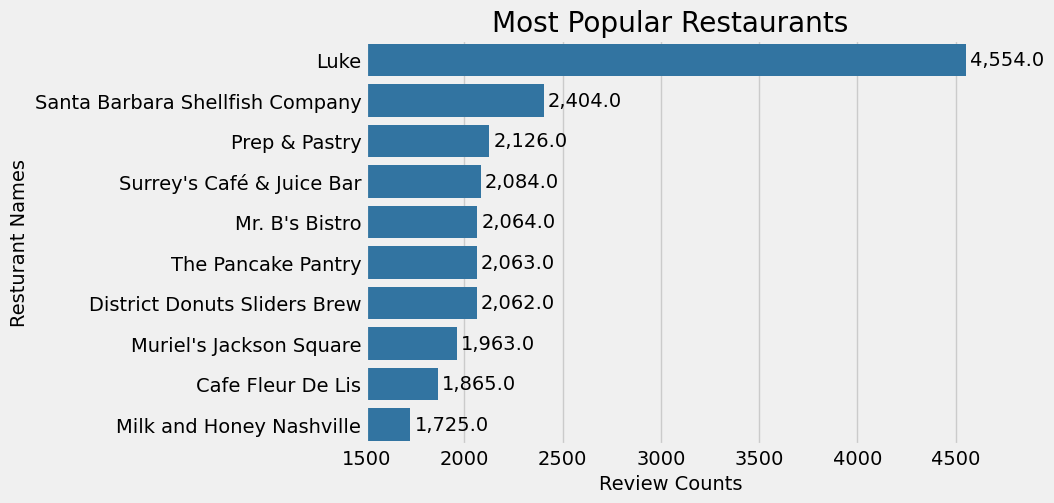

In [30]:
# most popular restaurants

index=data.drop_duplicates(subset='business_id').sort_values(by=['review_count','b/s_rating'],ascending=False)[:10].index

fig, ax=plt.subplots(figsize=(7,5))
sns.barplot(data=data.loc[index], x="review_count", y='name', color='tab:blue')
ax.set_ylabel("Resturant Names")
ax.set_xlabel("Review Counts")
ax.set_xlim([1500,4600])
ax.set_title("Most Popular Restaurants");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The output highlights the review counts for the different restaurants in descending order. At the top is Luke with an impressive 4554 reviews, signifying that it has received a substantial amount of customer feedback. Following closely is the Santa Barbara Shellfish Company with a notable 2404 reviews, demonstrating a strong presence and popularity among diners. Cafe Fleur De Lis is the second last on the list, with a still respectable 1865 reviews, though a bit lower than the previous two. Finally, Milk and Honey Nashville rounds out the list with 1725 reviews, indicating a significant number of satisfied patrons. These review counts offer insights into the popularity and customer engagement of these respective restaurants.

For analyzing the relationship between business rating and restaurant price, we will be creating a box plot. A box plot can provide more detailed insights into the distribution of price ranges for different rating categories. 

Number of businesses without price:  127


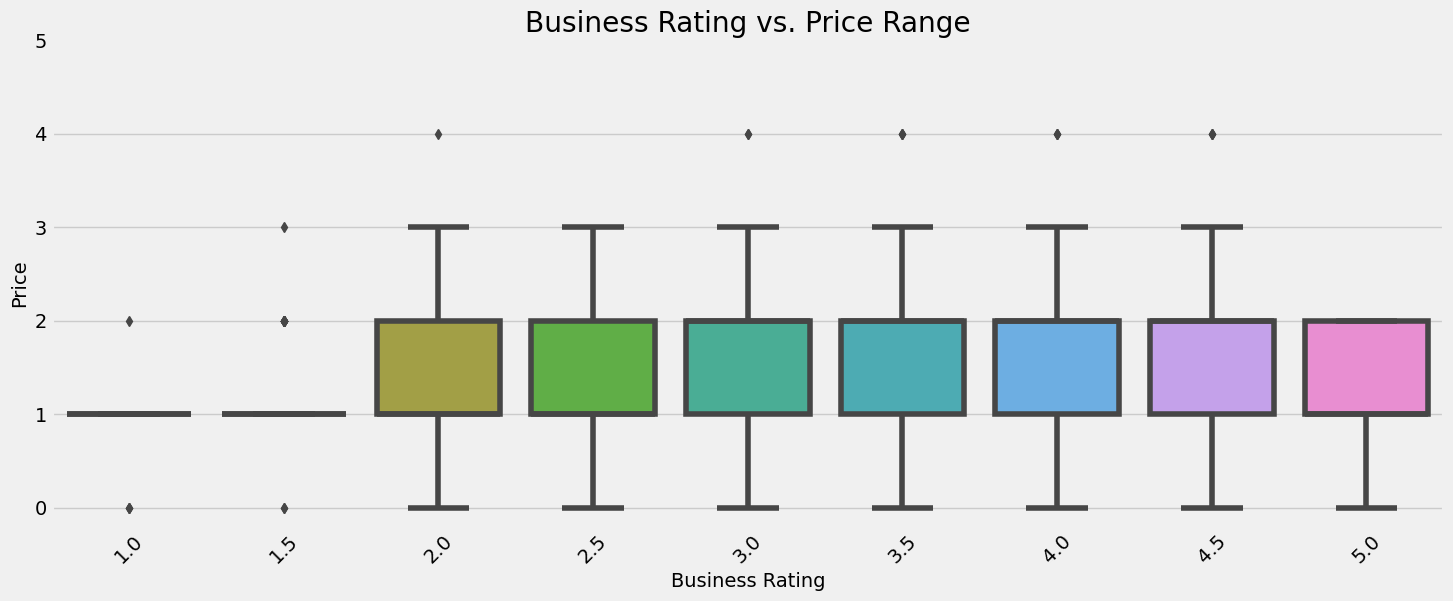

In [31]:
# Data preprocessing: Drop duplicate businesses and extract prices
df = data.drop_duplicates('business_id')
price = []

for val in df.attributes:
    try:
        p = eval(val)['RestaurantsPriceRange2']
        price.append(int(p))
    except:
        price.append(int(0))

# Count and print the number of businesses without price information
print("Number of businesses without price: ", sum([1 for i in price if i == 0]))

# Create a box plot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='b/s_rating', y=price, data=df, ax=ax)
ax.set_xlabel("Business Rating")
ax.set_ylabel("Price")
ax.set_yticks([0, 1, 2, 3, 4, 5])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Business Rating vs. Price Range")

plt.show()


The number of businesses without price is 127. This indicates that out of the analyzed businesses, 127 have missing or unspecified price information. It's important to note that the central line in each box represents the median price, which is a robust measure of the central tendency of restaurant prices for different rating levels. The vertical span of each box shows the interquartile range, providing insights into the spread or variability of prices within each rating category. 

To visualize the relationship between the number of reviews and business rating more effectively, we will be creating a 2D histogram or a hexbin plot. These plots provide a better representation of the density and concentration of data points. 

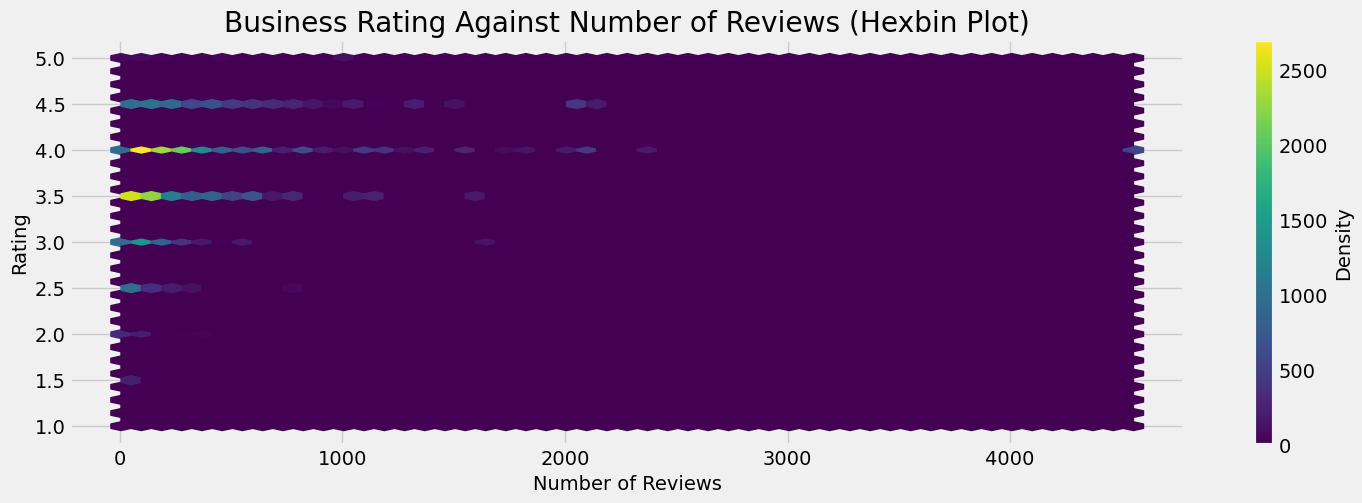

In [32]:
fig, ax = plt.subplots(figsize=(16,5))

# Create a hexbin plot
hb = ax.hexbin(data['review_count'], data['b/s_rating'], gridsize=50, cmap='viridis')

ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Rating")
ax.set_title('Business Rating Against Number of Reviews (Hexbin Plot)')

# Add a colorbar to indicate the density of points
cb = plt.colorbar(hb)
cb.set_label('Density')


### Review Word Cloud Analysis

To create a word cloud visualization that highlights the most frequent words found in positive review texts from the Yelp dataset. By filtering and analyzing the text of positive reviews, the word cloud offers an intuitive and visually appealing way to identify the key themes and frequently mentioned aspects that contribute to a positive customer experience. This visualization provides valuable insights into the factors that most positively influence customer satisfaction, aiding in the understanding of what makes certain businesses successful and well-reviewed on Yelp.

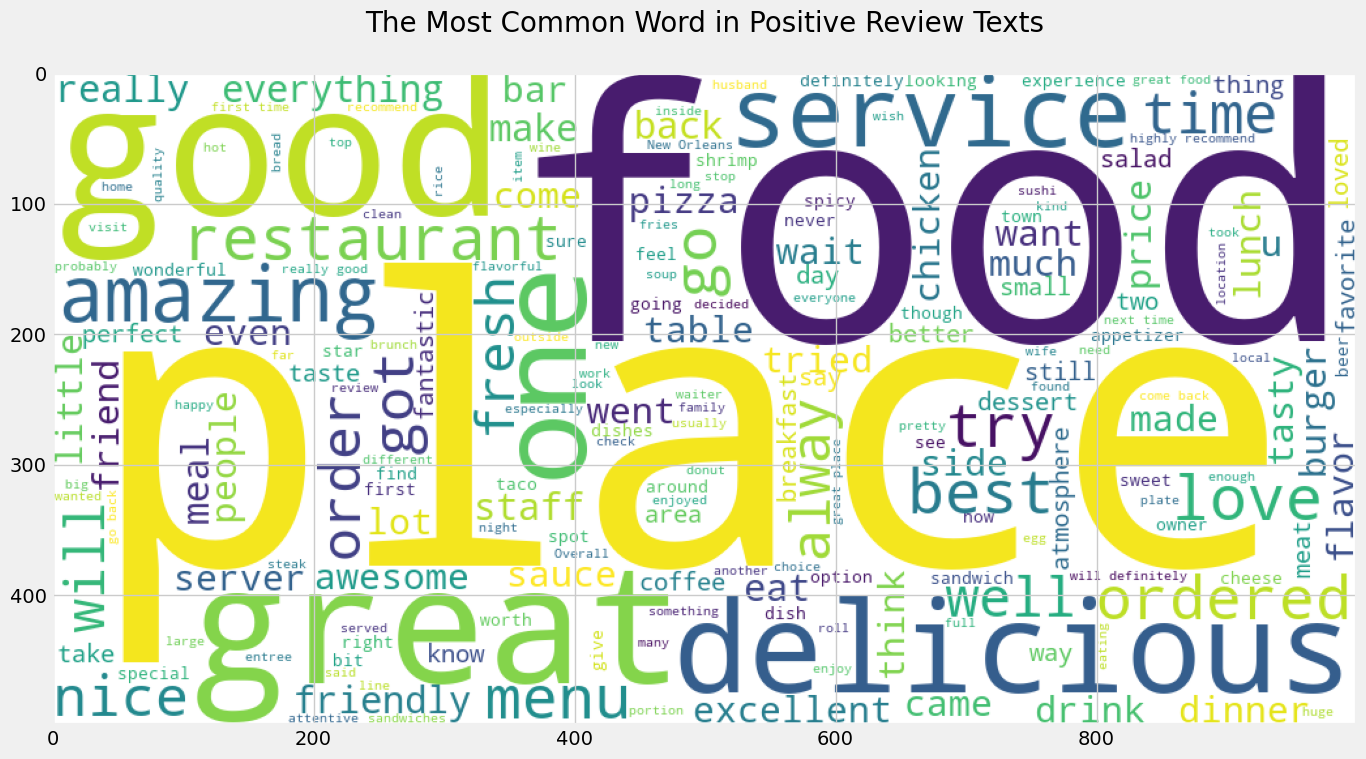

In [33]:

df=data.loc[ (data['rating']>=4)& (data['b/s_rating']>=4)] #only positive reviews

plt.figure(figsize=(15,15))

plt.title('The Most Common Word in Positive Review Texts\n', fontsize=20)

wc = WordCloud(max_words=200, min_font_size=10,height=500,width=1000,background_color="white")\
        .generate(' '.join(df['text'])) #create a WordCloud object 

plt.imshow(wc);

The word cloud visually represents the most common words found in the positive review texts, where the size of each word in the cloud corresponds to its frequency in the reviews. This provides an overview of the key terms and themes in positive reviews.

To create a word cloud visualization that highlights the most frequently occurring words in negative review texts from the Yelp dataset. By filtering and analyzing the text of negative reviews, the word cloud offers a visual representation of the common themes and frequently mentioned issues that contribute to a negative customer experience.

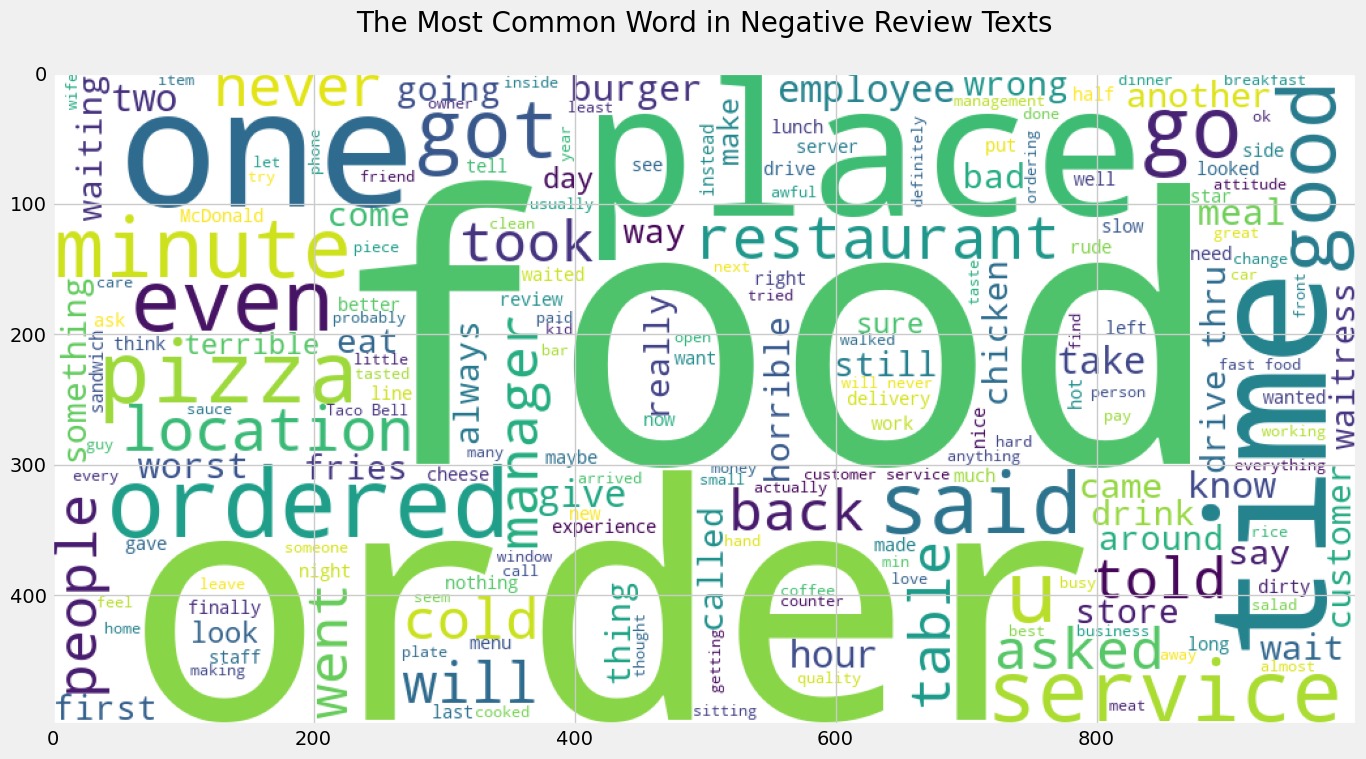

In [34]:

df=data.loc[ (data['rating']<=2)& (data['b/s_rating']<=2)]
plt.figure(figsize=(15,15))
plt.title('The Most Common Word in Negative Review Texts\n', fontsize=20)
wc = WordCloud(max_words=200,height=500,width=1000,background_color="white").generate(' '.join(df['text']))

plt.imshow(wc);

This visualization provides valuable insights into the factors that may lead to poor reviews, helping to identify areas of improvement for businesses and assisting in understanding the aspects that negatively impact customer satisfaction on Yelp.

### Interactive Map Visualization with Folium

The idea is to write a code that generates an interactive map using Folium, a Python library for creating leaflet maps. The map is centered at a specific latitude and longitude, which is determined by the first entry in the dataset. It then proceeds to populate the map with markers for selected businesses.

In [35]:

# Set up center latitude and longitude
center_lat = data['latitude'][0]
center_long = data['longitude'][0]

# Initialize map with center lat and long
map_ =folium.Map([center_lat,center_long], zoom_start=13)

# Adjust this limit to see more or fewer businesses
limit=1000

for index in range(limit):
    # Extract information about business
    lat = data.loc[index,'latitude']
    long = data.loc[index,'longitude']
    name = data.loc[index,'name']
    rating = data.loc[index,'b/s_rating']
    location = data.loc[index,'location']
    details = "{}\nStars: {} {}".format(name,rating,location)
    
    # Create popup with relevant details
    popup = folium.Popup(details,parse_html=True)
    
    # Create marker with relevant lat/long and popup
    marker = folium.Marker(location=[lat,long], popup=popup)
    
    marker.add_to(map_)
    
map_

The result is an interactive map with markers representing businesses. When you click on a marker, a popup appears with details about the business, such as its name, rating, and location. This visualization provides a spatial perspective on the distribution of businesses in the dataset.

## Modelling

### Sentiment Analysis

Now the next step is to perform some text preprocessing steps which include:

- Data Aggregation: aggregates text reviews
- Data Transformation: aggregated text reviews are stored in a new column
- Removal of Punctuations and Removal of Stopwords
- Spelling correction  
- Data Transformation: transforms the attributes column
- Feature Selection

Now let’s perform the above text preprocessing steps on the data:

#### Feature Engineering 
 
This feature engineering step helps prepare your data for analysis and modeling by selecting and transforming the most relevant attributes, which can lead to more effective modeling and improved insights for our project.


In [36]:
def new_df(data):
    # drop duplicates based on business_id and reset the index
    df = data.drop_duplicates('business_id').reset_index(drop=True)
    
    # loop through unique business_id values
    for id in data.business_id.unique():
    # extract text for each unique business_id and explode it into separate rows
        text = data.loc[data.business_id == id, 'text'].explode(ignore_index=True)
    # join the exploded text into a single string
        text = ' '.join(text)
        
    # assign the concatenated text to the reviews column for the corresponding business_id
        df.loc[data.business_id == id, 'reviews'] = text
    
    return df

# call the function and create the new df
df = new_df(data)
df.head()  

,user_id,business_id,rating,useful,text,name,latitude,longitude,b/s_rating,review_count,attributes,categories,hours,location,reviews
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,40.210196,-75.223639,3.0,169,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...","State:PA, City:North Wales, Address:1460 Bethl...","If you decide to eat here, just be aware it is..."
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,32.207233,-110.980864,3.5,47,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",Not-Available,"State:AZ, City:Tucson, Address:748 W Starr Pas...",Family diner. Had the buffet. Eclectic assortm...
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,"Wow! Yummy, different, delicious. Our favo...",Zaika,40.079848,-75.025080,4.0,181,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...","State:PA, City:Philadelphia, Address:2481 Gran...","Wow! Yummy, different, delicious. Our favo..."
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,Cute interior and owner (?) gave us tour of up...,Melt,29.962102,-90.087958,4.0,32,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...","State:LA, City:New Orleans, Address:2549 Banks...",Cute interior and owner (?) gave us tour of up...
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,I am a long term frequent customer of this est...,Dmitri's,39.938013,-75.148131,4.0,273,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30...","State:PA, City:Philadelphia, Address:795 S 3rd...",I am a long term frequent customer of this est...


In [37]:
def decompress(x):
    list_ = []
# evaluate the attributes column to convert it from a string to a dictionary
    data_dict = eval(x)
    
# iterate through the key-value pairs in the dictionary
    for key, val in data_dict.items():
# check if the key is in the specified categories and if the value is not "None"
        if (key in ['Ambience', 'GoodForMeal', 'BusinessParking']) and (val != "None"):
# if conditions are met, further iterate through sub-dictionary
            for key_, val_ in eval(data_dict[key]).items():
# if the sub-dictionary value is true, append it to the list
                if val_:
                    list_.append(f'{key}_{key_}')
        else:
# if the value is not false, append the key to the list
            if val != 'False':
                list_.append(key)
    
# join the list of selected attribute names into a space-separated string
    return " ".join(list_)

# create a new column 'attributes_true' in th df by applying the decompress function
# include a condition to handle cases where attributes is 'Not-Available'
df['attributes_true'] = df.attributes.apply(lambda x: decompress(x) if x != 'Not-Available' else ' ')


In [38]:
print("Before:")
print(eval(df.attributes[0]))
print('\n After:')
df['attributes_true'][0]      # Print the result for the first row of 'attributes'

Before:
{'NoiseLevel': "u'average'", 'HasTV': 'False', 'RestaurantsAttire': "'casual'", 'BikeParking': 'False', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}", 'WiFi': "'free'", 'DogsAllowed': 'False', 'Alcohol': "'none'", 'BusinessAcceptsCreditCards': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'WheelchairAccessible': 'True', 'BusinessAcceptsBitcoin': 'False', 'RestaurantsTableService': 'True', 'GoodForKids': 'True', 'Caters': 'False', 'HappyHour': 'False', 'RestaurantsDelivery': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}", 'OutdoorSeating': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"}

 After:


'NoiseLevel RestaurantsAttire Ambience_casual WiFi Alcohol BusinessAcceptsCreditCards RestaurantsGoodForGroups RestaurantsPriceRange2 WheelchairAccessible RestaurantsTableService GoodForKids RestaurantsDelivery GoodForMeal_lunch GoodForMeal_brunch GoodForMeal_breakfast OutdoorSeating RestaurantsTakeOut BusinessParking_lot'

In [39]:
# merging different columns to form one column of text 
df['details']=df[['attributes_true','categories','reviews']].apply(lambda x: ''.join(x), axis=1)

# previewing the first row value in the new column
df.details[0]

"NoiseLevel RestaurantsAttire Ambience_casual WiFi Alcohol BusinessAcceptsCreditCards RestaurantsGoodForGroups RestaurantsPriceRange2 WheelchairAccessible RestaurantsTableService GoodForKids RestaurantsDelivery GoodForMeal_lunch GoodForMeal_brunch GoodForMeal_breakfast OutdoorSeating RestaurantsTakeOut BusinessParking_lotRestaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, SandwichesIf you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker. This is the second time we tried turning point at this loc

From the text example above we can see that the column text contains many symbols, punctuations and stop word, next we shall remove the symbols and tokenize the column into a bag of words. These reasons serve to prepare text data for various text analysis and NLP tasks. It tokenizes the text, applies stemming, and standardizes the text for downstream processing, making it easier to analyze and extract meaningful information from the text.

In [40]:
# firts create a pattern that strips all the no word characters from words during tokenization
pattern =r"(?u)\b\w\w+\b"

# instantiate the tokenizer
tokenizer = RegexpTokenizer(pattern)

# instantiating the stemmer
stemmer = SnowballStemmer(language="english")

# creating a function to tokenize and stem words
def stem_and_tokenize(list_):
    tokens = tokenizer.tokenize(list_)
    return [stemmer.stem(token) for token in tokens]

After instantiating the tokenizer and stemmer we then calculate the text frequency-inverse document frequency values using the  **TfidfVectorizer()** method. Calculating TF-IDF values is a crucial step in preparing text data for analysis and transforming it into a format suitable for many NLP and text mining tasks. It helps convert unstructured text into structured numerical data that can be used for various analytical and machine learning purposes.

In [42]:
# instantiating the stop words
stopwords=stopwords.words('english')
# stemming the stopwords for uniformity during removing stopwords
stopwords=[ stemmer.stem(i) for i in stopwords]


tfidf = TfidfVectorizer( max_features=200 , 
                        stop_words=stopwords,
                        tokenizer= stem_and_tokenize
#                         ngram_range=(1, 2), 
#                         min_df=0, 
                        )


# fitting and transforming the details column to extract the top 200 features
tfidf_matrix=tfidf.fit_transform(df['details'])

# previewing the tfidf matrix
pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf.get_feature_names_out()).head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,also,alway,amaz,anoth,appet,area,around,ask,atmospher,attent,...,walk,want,way,well,went,wine,wonder,work,worth,would
0,0.030917,0.000000,0.033784,0.148950,0.000000,0.071060,0.00000,0.067906,0.000000,0.040761,...,0.000000,0.032251,0.068911,0.031813,0.033654,0.000000,0.000000,0.000000,0.037926,0.059517
1,0.075967,0.000000,0.000000,0.000000,0.000000,0.043651,0.00000,0.041713,0.046024,0.100155,...,0.046288,0.000000,0.042331,0.039084,0.041346,0.000000,0.000000,0.091133,0.000000,0.146242
2,0.030903,0.066009,0.067537,0.018610,0.022747,0.088784,0.05351,0.000000,0.018722,0.020371,...,0.000000,0.064471,0.017220,0.079496,0.084095,0.026438,0.020262,0.055608,0.056862,0.074362
3,0.061690,0.000000,0.000000,0.000000,0.000000,0.070894,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068750,0.063478,0.067151,0.316666,0.000000,0.000000,0.000000,0.059378
4,0.046791,0.266525,0.068173,0.037571,0.091846,0.000000,0.00000,0.034257,0.000000,0.020563,...,0.000000,0.032539,0.034764,0.016049,0.050933,0.053375,0.102267,0.018711,0.038265,0.090075


The code is configuring and using a TF-IDF vectorizer to convert text data into a numerical representation that captures word importance, while stemming stopwords for uniformity. The warning message is related to an unused parameter and does not affect the execution of the code.

In [43]:
# creating a matrix of the cosine similarities of the various rows based on the tidf scores
cosine_similarity=cosine_similarity(tfidf_matrix)
print("shape: ",cosine_similarity.shape)

# viewing the first column
cosine_similarity[0]

shape:  (3720, 3720)


array([1.        , 0.56019903, 0.52164205, ..., 0.50178735, 0.59844529,
       0.4746701 ])

The code is calculating the cosine similarity between the rows of the TF-IDF matrix (tfidf_matrix). The cosine similarity is a measure of similarity between two non-zero vectors in an inner product space, often used for text document similarity calculations. In this case, it's used to measure the similarity between the 'details' text descriptions of different businesses based on their TF-IDF scores.

In [ ]:
# import pickle
# pickle.dump(tfidf_matrix, open('tfidf_matrix.pkl', 'wb'))
# pickle.dump(cosine_similarity, open('cosine_similarity.pkl', 'wb'))
# pickle.dump(df, open('data.pkl', 'wb'))
# print("Files saved...")

### Content-Based Restaurant Recommendation 

In [44]:
def folium_map(data):
    dff=data.reset_index(drop=True)


# Set up center latitude and longitude
    center_lat = dff['latitude'][0]
    center_long = dff['longitude'][0]

# Initialize map with center lat and long
    map_ =folium.Map([center_lat,center_long], zoom_start=7)

# Adjust this limit to see more or fewer businesses
    limit=dff.shape[0]
    print(limit)
    for index in range(limit):
        # Extract information about business
        lat = dff.loc[index,'latitude']
        long = dff.loc[index,'longitude']
        name = dff.loc[index,'name']
        rating = dff.loc[index,'b/s_rating']
        location = dff.loc[index,'location']
        details = "{}\nStars: {} {}".format(name,rating,location)

# Create popup with relevant details
        popup = folium.Popup(details,parse_html=True)

# Create marker with relevant lat/long and popup
        marker = folium.Marker(location=[lat,long], popup=popup)

        marker.add_to(map_)

    return display(map_)

In [45]:
folium_map(data=df.loc[:10])

11


The content_based function uses content-based recommendation techniques to provide restaurant recommendations based on user input preferences, restaurant names, or user-defined text. The recommendations can be filtered by minimum rating and location and are visually presented on an interactive map if specified.

In [46]:
def content_based(df=df, name:str= None , rating:int =1, num:int=5, text: str=None, location:str = None):

    
    if name:
        index_=df.loc[df.name== name].index[0]                  # find the index of the input name
        sim=list(enumerate(cosine_similarity[index_]))                          # extract similarity vector of that name index
        sim=sorted(sim, key=lambda x: x[1], reverse=True)[1:num+1]         # arrange the vector values in ascending order
        indices= [i[0] for i in sim]                                     # Extract the indices of the top high scores
        print(f"Top {num} Restaurants Like [{name}]")
        if location:
            df=df.loc[ (df['b/s_rating']>=rating) & ( df.location.str.contains(location))]
            folium_map(df)
        else:
            df= df.loc[ (df['b/s_rating']>=rating) ]               
        return df.loc[indices,('name','b/s_rating','review_count','location')].sort_values('b/s_rating', ascending=False)   
    
    # if the name is None then switch to genre parameter
    else:
        # if the genres has passed input values then this if statement runs            
        if text: 
                text=text.lower()
                tokens=stem_and_tokenize(text)  
                tokens=[ word for word in tokens if word not in stopwords] 
                text_set=set(tokens)
                
                if location:
                    df=df.loc[ (df.location.str.contains(location)) & (df.rating>=rating)].reset_index(drop=True)

                vectors=[]
                for words in df.details:
                    words=words.lower()
                    words=stem_and_tokenize(text)  
                    words=[ word for word in tokens if word not in stopwords] 
                    words=set(words)
                    vector=text_set.intersection(words)
                    vectors.append(len(vector))
                    
                vectors=sorted(list(enumerate(vectors)), key= lambda x: x[1], reverse=True)[:num]
                indices= [i[0] for i in vectors]
                print(f"Top {num} Best Resturants Based on entered text[{vector}]:")
                df=df.loc[indices].sort_values('b/s_rating',ascending=False)
                if location: folium_map(df)
                return df[['name','b/s_rating','review_count','location']]
        
        if location:
            df=df.loc[ df.location.str.contains(location)& (df.rating>=rating)]
            df=df.sort_values(['review_count','b/s_rating'])[:5]  #b/s_rating
            folium_map(data=df)
            return df[['name','b/s_rating','review_count','location']]
         
        # if both the name and genre are None the top most  watched and rated movies are recommended
        else:
            
            if location:
                df=df.loc[ df.location.str.contains(location)]
                
            df=df.loc[data['b/s_rating']>=rating].sort_values(by=['review_count','b/s_rating'],ascending=False)[:num]
            if location: folium_map(data=df)
            print("Most Popular Restaurants")
            return df[['name','b/s_rating','review_count','location']]
    
    

In [47]:
# running the recommender on default parameters
content_based()

Most Popular Restaurants


,name,b/s_rating,review_count,location
76,Luke,4.0,4554,"State:LA, City:New Orleans, Address:333 Saint ..."
44,Santa Barbara Shellfish Company,4.0,2404,"State:CA, City:Santa Barbara, Address:230 Stea..."
247,Prep & Pastry,4.5,2126,"State:AZ, City:Tucson, Address:2660 N Campbell..."
298,Surrey's Café & Juice Bar,4.5,2084,"State:LA, City:New Orleans, Address:1418 Magaz..."
33,Mr. B's Bistro,4.0,2064,"State:LA, City:New Orleans, Address:201 Royal St"


In [48]:
content_based(location='Philadelphia')

5


,name,b/s_rating,review_count,location
3352,Papa John's Pizza,1.5,5,"State:PA, City:Philadelphia, Address:1555 Wads..."
3610,New Napoli Famous Pizza,2.0,5,"State:PA, City:Philadelphia, Address:911 Tyson..."
3358,Amato's Deli Restaurant,2.5,5,"State:PA, City:Philadelphia, Address:3000 S Sy..."
2223,Venuto's Old World Pizza,3.0,5,"State:PA, City:Philadelphia, Address:6024 Ridg..."
3053,Philly Dawgz,4.0,5,"State:PA, City:Philadelphia, Address:3240 N Br..."


In [49]:
# recommending similar restaurants to the entered name
content_based( name="Backspace Bar & Kitchen")

Top 5 Restaurants Like [Backspace Bar & Kitchen]


,name,b/s_rating,review_count,location
2914,Black Palm Restaurant,4.5,11,"State:FL, City:St. Petersburg, Address:1700 Pa..."
794,Independence Brew Pub,4.5,5,"State:PA, City:Philadelphia, Address:1150 Filb..."
591,Union Station Pub & Grill,4.0,9,"State:LA, City:New Orleans, Address:735 St Jos..."
342,Fellini Cafe of Media,4.0,508,"State:PA, City:Media, Address:106 W State St"
3240,Dimaggio's Restaurant,2.5,12,"State:AB, City:Sherwood Park, Address:Not-Avai..."


In [50]:
# recommending restaurants with attributes in the entered text
content_based( text="I want a clean restaurant with good desert and parking space and a romantic environment")

Top 5 Best Resturants Based on entered text[{'good', 'romant', 'desert', 'space', 'want', 'restaur', 'clean', 'environ', 'park'}]:


,name,b/s_rating,review_count,location
2,Zaika,4.0,181,"State:PA, City:Philadelphia, Address:2481 Gran..."
3,Melt,4.0,32,"State:LA, City:New Orleans, Address:2549 Banks..."
4,Dmitri's,4.0,273,"State:PA, City:Philadelphia, Address:795 S 3rd..."
1,Kettle Restaurant,3.5,47,"State:AZ, City:Tucson, Address:748 W Starr Pas..."
0,Turning Point of North Wales,3.0,169,"State:PA, City:North Wales, Address:1460 Bethl..."


In [51]:
# recommending restaurants with attributes in the entered text
content_based(rating=4, location="PA",num=10,\
        text="restaurant with crubs and sushi and a romantic setting and parking space. also the food should be delicious")

Top 10 Best Resturants Based on entered text[{'delici', 'crub', 'romant', 'food', 'restaur', 'also', 'sushi', 'set', 'space', 'park'}]:
10


,name,b/s_rating,review_count,location
5,Thai Place Restaurant,4.5,222,"State:PA, City:Phoenixville, Address:700 Nutt ..."
0,Zaika,4.0,181,"State:PA, City:Philadelphia, Address:2481 Gran..."
4,Good Karma Cafe,4.0,249,"State:PA, City:Philadelphia, Address:928 Pine St"
7,Portobello Cafe,4.0,137,"State:PA, City:Eddystone, Address:1423 Chester..."
9,The Coventry Deli,4.0,65,"State:PA, City:Philadelphia, Address:2000 Mark..."
1,Fries Rebellion,3.5,103,"State:PA, City:Quakertown, Address:1441 S West..."
2,LaScala's,3.5,367,"State:PA, City:Philadelphia, Address:615 Chest..."
3,Rittenhouse Grill,3.5,290,"State:PA, City:Philadelphia, Address:1701 Locu..."
6,Anthony's at Paxon Hollow,3.5,32,"State:PA, City:Broomall, Address:850 Paxon Hol..."
8,Wawa,3.5,8,"State:PA, City:Norristown, Address:2544 W Main..."


#### Collaborative filtering

Here the tasks related to building a collaborative filtering recommendation system using the Surprise library are undertaken for collaborative filtering by selecting the relevant columns, importing the Surprise library, initializing a Reader object to specify the data format, and then loading the data into a Surprise Dataset object for further analysis and model building.

In [53]:
new_df = data[['user_id', 'business_id', 'rating']] #selecting specific columns that are relevant for collaborative filtering
reader = Reader()
data_2 = Dataset.load_from_df(new_df,reader)

In [54]:
data.shape

(39334, 14)

In [55]:
dataset = data_2.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of Restaurants: ', dataset.n_items)

Number of users:  34497 

Number of Restaurants:  3720


In [56]:
# define a dictionary params with hyperparameter values to be tested
params = {'n_factors': [20, 50, 100], # number of factors for matrix factorization
         'reg_all': [0.02, 0.05, 0.1]} # regularization term
# create a GridSearchCV object 'g_s_svd' for hyperparameter tuning
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1) # specify the algorithm (SVD) to be tuned
# fit the GridSearchCV object to the data to find the best hyperparameters
g_s_svd.fit(data_2)


Here we perform hyperparameter tuning for the SVD collaborative filtering model using grid search and cross-validation. It tests different values of the number of latent factors (n_factors) and the regularization term (reg_all) to find the combination that results in the best model performance. The final best hyperparameters can be accessed from the g_s_svd object for use in the model.

In [57]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 1.252951480278615, 'mae': 1.0071107854247274}
{'rmse': {'n_factors': 20, 'reg_all': 0.05}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


The RMSE value for the optimized SVD model is approximately 1.25, indicating the model's average prediction error in terms of user ratings. Lower RMSE values are desirable as they signify better predictive accuracy.                              
The MAE value for the optimized SVD model is approximately 1.01, representing the average absolute difference between predicted and actual user ratings. A lower MAE indicates improved prediction accuracy.                                            
The best-performing hyperparameter values are as follows:                       
1) For RMSE, the optimal hyperparameters are 'n_factors' = 20 and 'reg_all' = 0.05.
2) For MAE, the optimal hyperparameters are 'n_factors' = 20 and 'reg_all' = 0.02.   
These results indicate that the SVD collaborative filtering model, when configured with these hyperparameters, provides a relatively low prediction error and is well-suited for making personalized recommendations based on user ratings.

In [58]:
df_3 = business[['business_id', 'name', 'categories']].copy()
df_3['categories'].fillna('', inplace=True)  # Replace NaN values with an empty string
df_restaurant = df_3.loc[df_3['categories'].str.contains('Restaurants')]

The code extracts relevant columns from the business DataFrame, fills missing category values with an empty string, and then filters and stores only those rows that represent restaurants in the df_restaurant DataFrame. This is useful for isolating and working with restaurant-specific data from the larger dataset.

In [59]:
# created an instance of the SVD model with specified hyperparameters
svd = SVD(n_factors= 20, reg_all=0.02)
# fit the SVD model to the dataset
svd.fit(dataset)

The code we just did initializes an SVD model with specific hyperparameters and then trains the model on the provided dataset. The trained SVD model can be used for various tasks, such as making personalized recommendations based on user-item interactions.

In [60]:
svd.predict("8g_iMtfSiwikVnbP2etR0A", "Pns2l4eNsfO8kk83dixA6A")

Prediction(uid='8g_iMtfSiwikVnbP2etR0A', iid='Pns2l4eNsfO8kk83dixA6A', r_ui=None, est=3.7382211174371323, details={'was_impossible': False})

In [61]:
df_restaurant.head()

,business_id,name,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,"Vietnamese, Food, Restaurants, Food Trucks"


In [62]:

# define a function named 'restaurant_rater' that takes user inputs to rate restaurants
def restaurant_rater(user_id,num, category=None):
    userID = user_id
    rating_list = [] # create an empty list to store ratings
    # continue the loop until the desired num is collected
    while num > 0:
        if category: # select a random restaurant that matches the specified category
            restaurant = df_restaurant[df_restaurant['categories'].str.contains(category)].sample(1)
        else:
            restaurant = df_restaurant.sample(1)
        print(tabulate(restaurant, headers='keys', tablefmt='fancy_grid', showindex=False))
        rating = input('How do you rate this restaurant on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_restaurant = {'user_id':userID,'business_id':restaurant['business_id'].values[0],'rating':rating}
            # append the rating information to the rating_list
            rating_list.append(rating_one_restaurant) 
            num -= 1
            # return the list of user ratings and restaurant information
    return rating_list

This function above allows a user to interactively rate restaurants by providing their ratings for a specified number of restaurants, and it collects this information in a list for further analysis or use in a recommendation system. The code also considers the restaurant category for selecting restaurants to rate if a category is provided.

In [63]:
user_rating = restaurant_rater("8g_iMtfSiwikVnbP2etR0A", 4, 'Sandwiches')

╒════════════════════════╤═══════════════════╤═════════════════════════╕
│ business_id            │ name              │ categories              │
╞════════════════════════╪═══════════════════╪═════════════════════════╡
│ 60sxUqNnlumpiv_5soB_Eg │ TOGO'S Sandwiches │ Sandwiches, Restaurants │
╘════════════════════════╧═══════════════════╧═════════════════════════╛
How do you rate this restaurant on a scale of 1-5, press n if you have not seen :
n
╒════════════════════════╤═════════════════╤═══════════════════════════════════════════╕
│ business_id            │ name            │ categories                                │
╞════════════════════════╪═════════════════╪═══════════════════════════════════════════╡
│ GevY5sVM5PKhnAy5BbdeVQ │ Parran's Poboys │ Seafood, Sandwiches, Italian, Restaurants │
╘════════════════════════╧═════════════════╧═══════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, press n if you have not seen :
2
╒═════════════════════

In [64]:
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([new_df, user_ratings], axis=0)
new_data = Dataset.load_from_df(new_ratings_df,reader)

This code above prepares a dataset for collaborative filtering by combining new user ratings with existing restaurant ratings, creating a unified dataset that can be used for building collaborative filtering recommendation models.

In [65]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 20, reg_all=0.02)
svd_.fit(new_data.build_full_trainset())

Next we initialize an SVD collaborative filtering model with specific hyperparameters and then trains the model using the training data created from the combined dataset. Once trained, the model can be used to make restaurant recommendations to users based on their historical ratings and preferences.

In [66]:
# make predictions for the user
# create a list of tuples in the format (business_id, predicted_score)
list_of_restaurants = []
for m_id in new_df['business_id'].unique():
    list_of_restaurants.append( (m_id,svd_.predict(1000,m_id)[3]))

Here we want to make predictions for a specific user (user ID 1000) using the trained SVD collaborative filtering model and use this to recommend restaurants to the user based on their likely preferences.

In [67]:
ranked_restaurants = sorted(list_of_restaurants, key=lambda x:x[1], reverse=True)

In [68]:
def recommended_restaurants(ranked_restaurants,df_restaurant,n):
        for idx, rec in enumerate(ranked_restaurants):
            title = df_restaurant.loc[df_restaurant['business_id'] == rec[0]]
            print('Recommendation # ', idx+1)
            print(tabulate(title, headers='keys', tablefmt='fancy_grid', showindex=False))
            n-= 1
            if n == 0:
                break
            
recommended_restaurants(ranked_restaurants,df_restaurant,3)

Recommendation #  1
╒════════════════════════╤═════════════════╤═══════════════════════════════════════════════════════════════════════════════╕
│ business_id            │ name            │ categories                                                                    │
╞════════════════════════╪═════════════════╪═══════════════════════════════════════════════════════════════════════════════╡
│ _aKr7POnacW_VizRKBpCiA │ Blues City Deli │ Delis, Bars, Restaurants, Nightlife, Pubs, American (Traditional), Sandwiches │
╘════════════════════════╧═════════════════╧═══════════════════════════════════════════════════════════════════════════════╛
Recommendation #  2
╒════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════════════════════════════╕
│ business_id            │ name                          │ categories                                                           │
╞════════════════════════╪═══════════════════════════════╪═════════════════

In [81]:

# define a function named 'restaurant_rater' that takes user inputs to rate restaurants
def restaurant_rater(num: int = 3, location=None):
    
    df_restaurant = data.drop_duplicates('business_id')

        # Now you can perform mathematical operations on 'user_id'
    user_id = df_restaurant['user_id'].max() + 1

    userID = user_id
    rating_df = pd.DataFrame()   # create an empty list to store ratings   # create an empty list to store ratings
    # continue the loop until the desired num is collected
    while num > 0:
        if location: # select a random restaurant that matches the specified category
            restaurant = df_restaurant[df_restaurant['location'].str.contains(location)].sample(1)
        else:
            restaurant = df_restaurant.sample(1)
        print(tabulate(restaurant[['name','b/s_rating','location']], headers='keys', tablefmt='fancy_grid', showindex=False))
        rating = input("How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: ")
        
        def checker(rating):
            if (len(rating)!= 0):
                while (float(rating)>5) :
                    print("Enter valid rating, scale of 1-5 or Enter")  
                    rating= input()
                return rating
            else: return rating
            
        # calling the function to confirm the entered rating 
        rating = checker(rating)
        if len(rating) == 0:                                        # if no rating is entered 
            num-=1                                                  # the jumps to select another movie
            continue
        else:
            restaurant.loc[:,('user_id')]= user_id                   # then the selected restaurant is assigned the user id
            restaurant.loc[:,('rating')]= rating
            rating_df=pd.concat([rating_df,restaurant], axis=0)   # the movie is added to our new user rated dataframe
            num-=1                                                  # then anothe movie is suggested till num==0
            # return the list of user ratings and restaurant information
    return rating_df

In [82]:
restaurant_rater()

TypeError: can only concatenate str (not "int") to str

In [ ]:
restaurant_rater()

In [ ]:
restaurant_rater(location='PA')

> With the defined rated() function, we proceed to create a collaborative filtering function  while using our SVD model

In [ ]:
def cf_model(num:int=3, location:str=None):
    """
    The function takes the following inputs;
    
    df: DataFrame - a dataframe containing the movie ids, name of movie, and genres
    num:int - number of ratings to recommend
    genre - a specific genre input from user
    
    The function the takes user ratings and appends then to the dataframe then fits this new dataframe to the SVD model
    The predicts this users rating on all the movie in the dataframe then selects the top predictions and 
    recomends those movies
    """
    # to remove
    df=data.drop_duplicates('business_id')
    
    # calling the rater function for user to enter movie ratings
    user_ratings=restaurant_rater(num=num, location=location)
    
    # then add the user ratings to our df
    df=pd.concat([df,user_ratings],axis=0)

    # convert the nwe dataset into surprise format
    dataset = Dataset.load_from_df(df[['user_id','business_id','rating']],reader)
    
    # then fit the surprise data to the SVD
    svd = SVD(n_factors= 20, reg_all=0.02)
    svd.fit(dataset.build_full_trainset())
    
    # extract the user rating in the ratings dataframe
    user_id=user_ratings['user_id'].values[0]
    
    # select a random restaurant that matches the specified category
    if location: 
            df = df.loc[df['location'].str.contains(location)]
        
    #create an empty list to append the model predictions
    user_predictions=[]
    
    # loopin over all the unique restaurant ids in the dataframe and appending the predictions to user prediction list
    for  iid in df.business_id.unique():
        user_predictions.append( (iid , svd.predict(user_id, iid)[3]))
    
    # sorting the predictions in descending order of the predictions values
    top_pred = sorted(user_predictions , key =lambda x: x[1], reverse=True)
    
    # selecting the top 'num'(number of predictions) prediction indicies
    indices=[i[0] for i in top_pred[:num]]  
    
    #using the extracted indices them extract the resturant titles
    rec = df.loc[ df['business_id'].isin(indices)].sort_values('business_id', ascending=True)
    display(folium_map(rec))
    return rec[['name','b/s_rating','location']].reset_index(drop=True)  #then retun the movie titles and ratings

In [ ]:
cf_model()

In [ ]:
cf_model(num=5,location='LA')

### Recommendation 

### Conclusion

### Next Steps